In [24]:
import numpy as np
%matplotlib inline

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-09-18 18:01:27,247: Credentials are already in use. The existing account in the session will be replaced.


In [54]:
# Functions

def check_binary(binary):
    if len(binary) == 0 or len(binary) == 1:
        return True
    last = binary[0]
    for i in binary[1:]:
        if i == last:
            return False
        last = i
    return True

def binarize(vector):
    binary = []
    max_len = 0
    for i in vector:
        binary_i = bin(i)[2:]
        if len(binary_i) > max_len:
            max_len = len(binary_i)
        binary.append(binary_i)
    for index in range(len(binary)):
        i = binary[index]
        if len(i) < max_len:
            binary[index] = (max_len - len(i)) * "0" + i
    return binary

def plot_qc(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    results = job.result()
    counts = results.get_counts()
    plot_histogram(counts)
    
def bell_00(qc):
    qc.h(0)
    qc.cx(0, 1)
    return qc

def bell_01(qc):
    qc.x(1)
    return bell_00(qc)

def state(qc, s):
    if s == "00":
        pass
    elif s == "01":
        qc.x(0)
    elif s == "10":
        qc.x(1)
    elif s == "11":
        qc.x(0)
        qc.x(1)
    elif s == "b00":
        qc = bell_00(qc)
    elif s == "b01":
        qc = bell_01(qc)
    return qc

In [55]:
# Classical
vector = [1, 5, 4, 2]
binary = binarize(vector)
solutions = []
for index in range(len(binary)):
    if check_binary(binary[index]):
        solutions.append(index)
binary_solutions = binarize(solutions) 
print(binary)
print(solutions)
print(binary_solutions)

['001', '101', '100', '010']
[1, 3]
['01', '11']


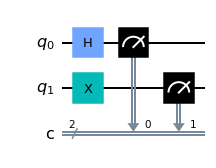

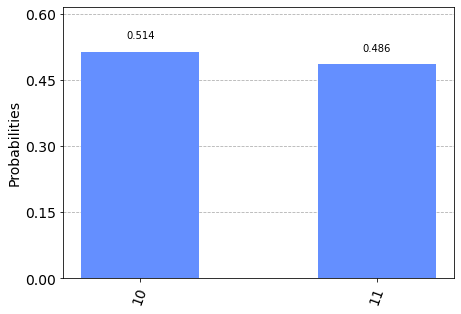

In [56]:
# Quantum

n = 2
q = range(n)
bs_0 = binary_solutions[0]
bs_1 = binary_solutions[1]
qc = qc = QuantumCircuit(qubits, qubits)

if len(binary_solutions) == 2:
    if bs_0 == bs_1:
        qc = state(qc, bs_0)
    elif bs_0[0] == "0" == bs_1[0]:
        qc.h(1)
    elif bs_0[0] == "1" == bs_1[0]:
        qc.x(0)
        qc.h(1)
    elif bs_0[1] == "0" == bs_1[1]:
        qc.h(0)
    elif bs_0[1] == "1" == bs_1[1]:
        qc.x(1)
        qc.h(0)
    else:
        qc = state(qc, f"b{bs_0}")
    
qc.measure(q, q)
qc.draw("mpl")
plot_qc(qc)